In [5]:
# install.packages("PerformanceAnalytics")
library(quantmod)

########################################################################################
##                        Imports and set working directory                           ##
########################################################################################
library(urca)
library(tseries)
# require(tseries)
# require(urca) #Used for the ADF Test
library(PerformanceAnalytics)
options(repr.plot.width = 16, repr.plot.height = 7)


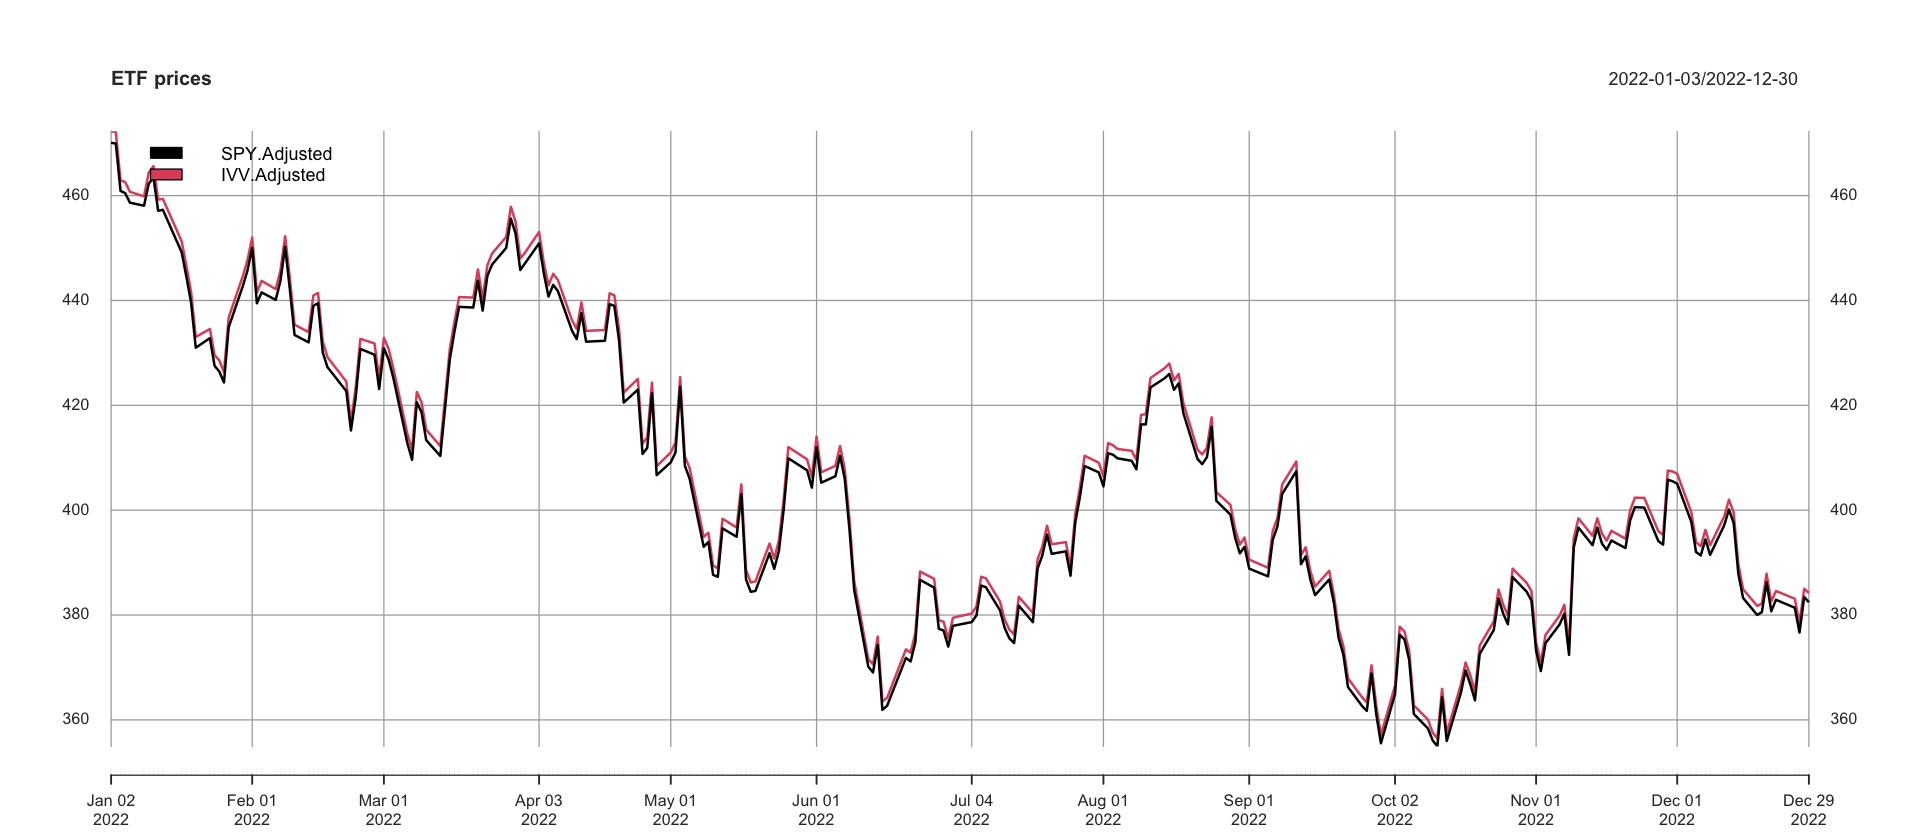

In [6]:
SPY_prices <- Ad(getSymbols("SPY", from = "2022-01-01", to = "2022-12-31", auto.assign = FALSE))
IVV_prices <- Ad(getSymbols("IVV", from = "2022-01-01", to = "2022-12-31", auto.assign = FALSE))
plot(cbind(SPY_prices, IVV_prices), legend.loc = "topleft", main = "ETF prices")

In [7]:
library(xts)
library(quantmod)

# set begin-end dates and stock namelist
begin_date <- "2022-01-01"
end_date <- "2022-12-31"
stock_namelist <- c('HWM', 'GL')

# download data from YahooFinance
prices <- xts()
for (stock_index in 1:length(stock_namelist))
  prices <- cbind(prices, Ad(getSymbols(stock_namelist[stock_index], 
                                        from = begin_date, to = end_date, auto.assign = FALSE)))
colnames(prices) <- stock_namelist
tclass(prices) <- "Date"
T <- nrow(prices)  # number of days

# interpolate NAs
anyNA(prices)
#> [1] TRUE
prices <- na.approx(prices)

[1] FALSE

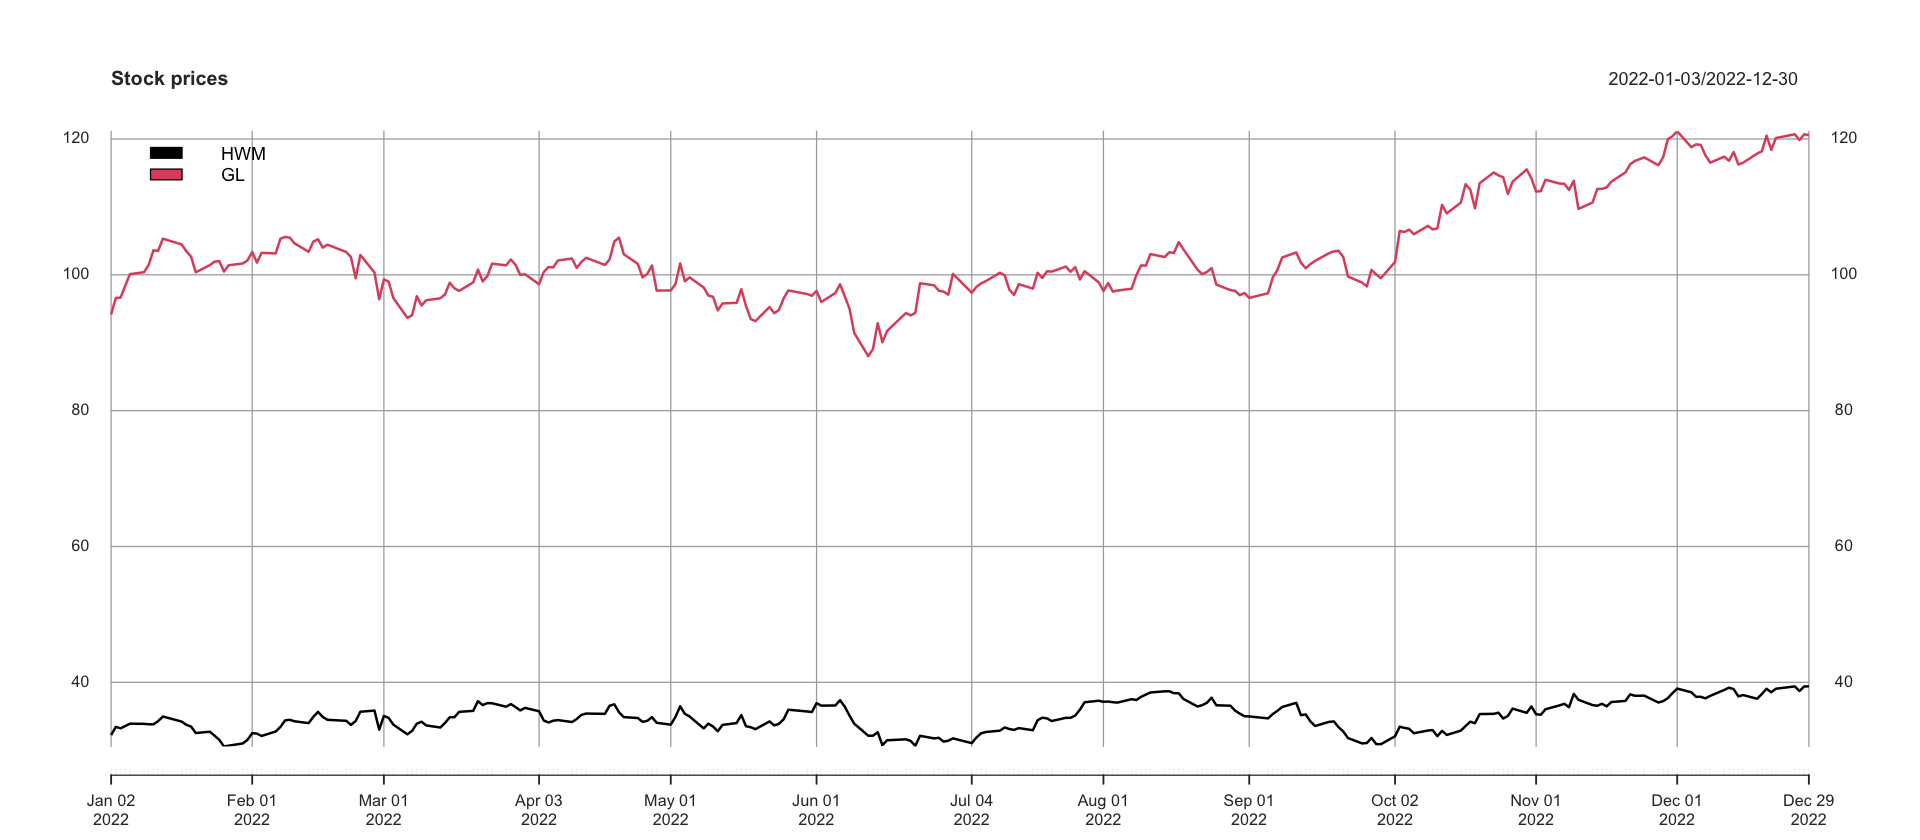

In [8]:
plot(prices, legend.loc = "topleft", main = "Stock prices")


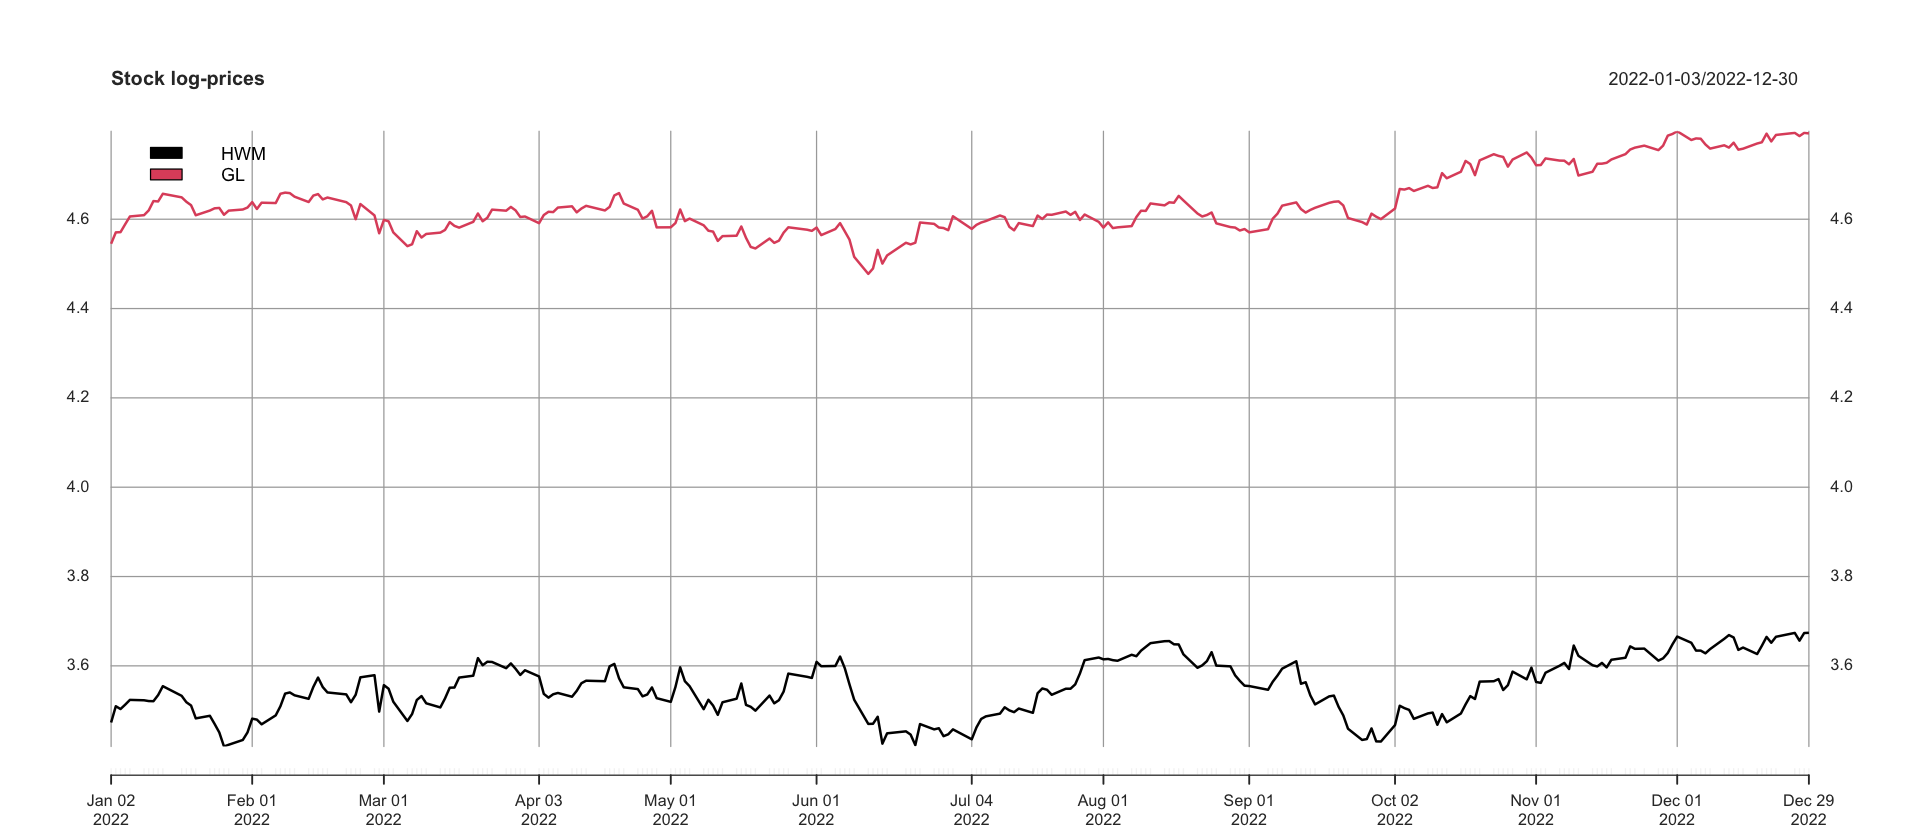

In [9]:
logprices <- log(prices)
plot(logprices, legend.loc = "topleft", main = "Stock log-prices")

In [10]:
T_trn <- round(0.9*T)  # define the training set
T_tst <- T - T_trn
y1 <- logprices[, 1]
y2 <- logprices[, 2]

# do LS regression
ls_coeffs <- coef(lm(y1[1:T_trn] ~ y2[1:T_trn]))
ls_coeffs
#> (Intercept) y2[1:T_trn] 
#>    2.435953    0.864618
mu <- ls_coeffs[1]
gamma <- ls_coeffs[2]

(Intercept) y2[1:T_trn] 
  1.9401180   0.3465714

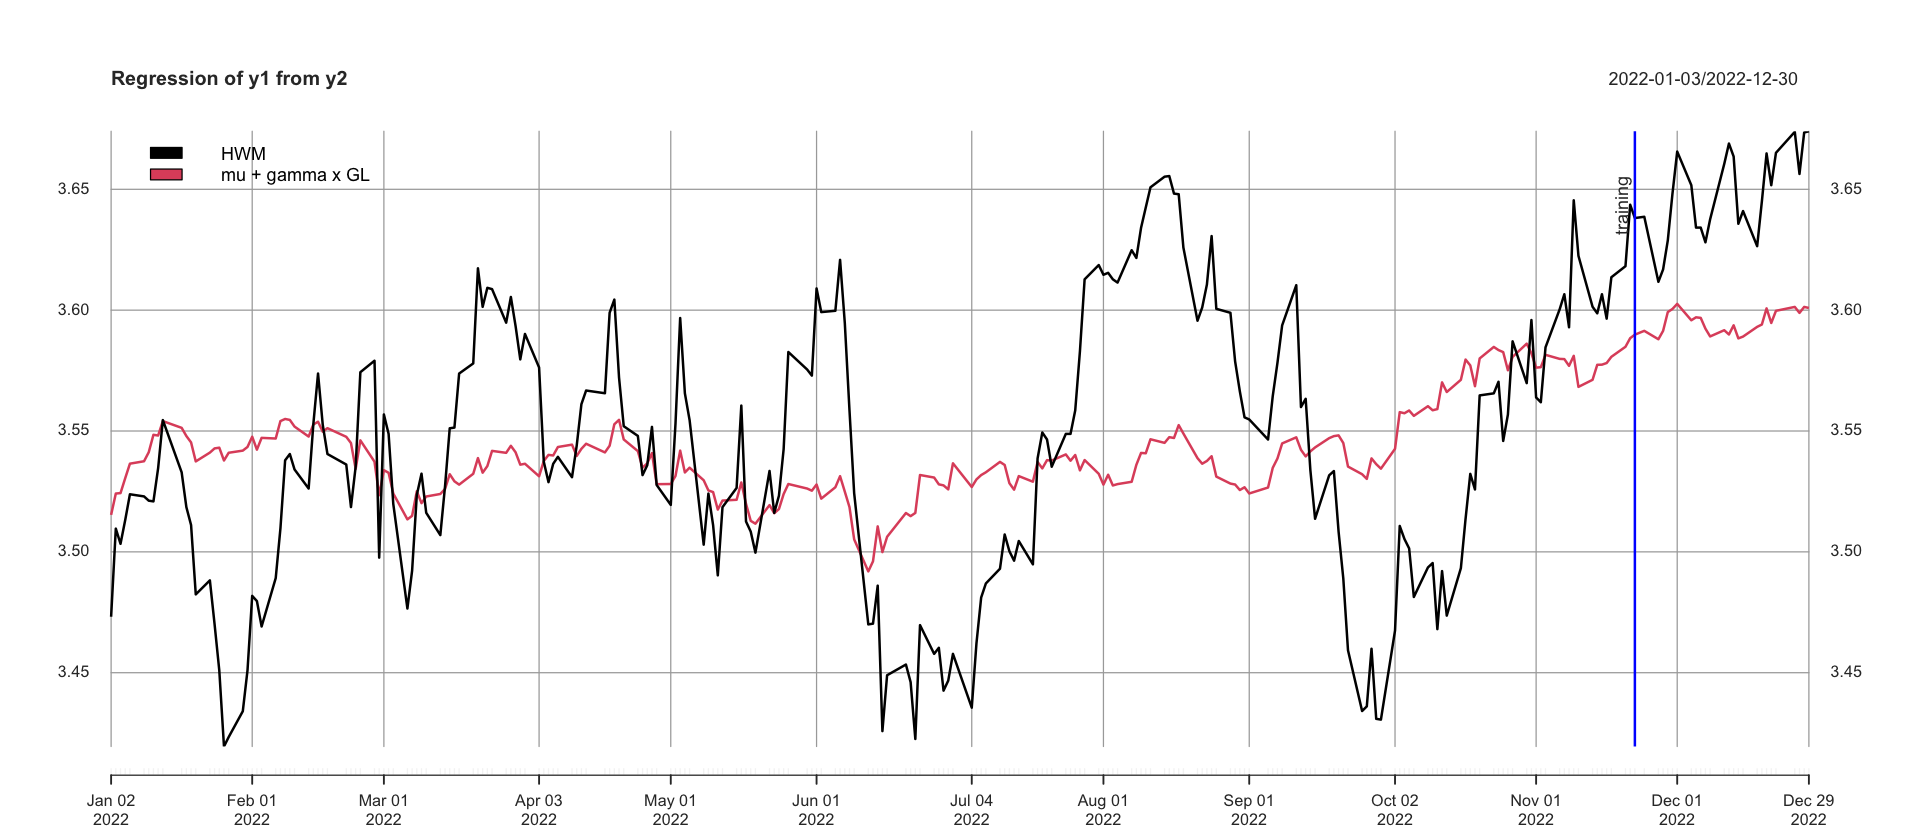

In [11]:
tmp <- cbind(y1, mu + gamma*y2)
colnames(tmp) <- c(colnames(y1), paste("mu + gamma x", colnames(y2)))
{ plot(tmp, legend.loc = "topleft", main = "Regression of y1 from y2")
  addEventLines(xts("training", index(y1[T_trn])), srt = 90, pos = 2, lwd = 2, col = "blue") }

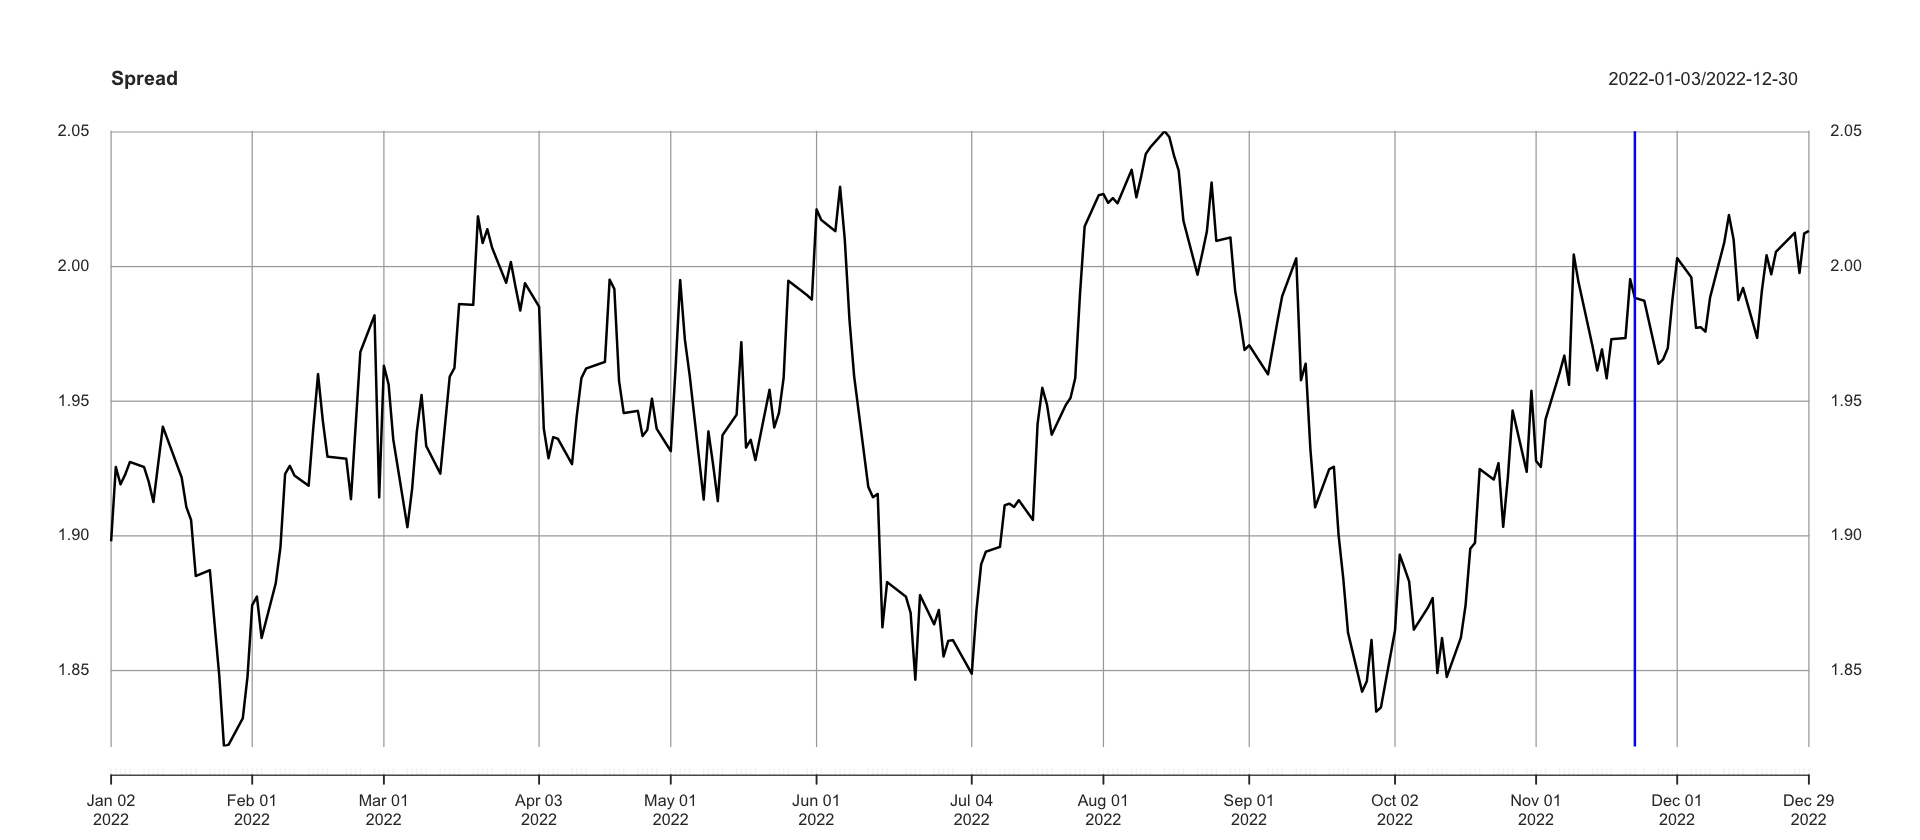

In [12]:
spread <- y1 - gamma*y2
{ plot(spread, main = "Spread")
  addEventLines(xts("", index(y1[T_trn])), lwd = 2, col = "blue") }